In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("US_honey_dataset.csv")
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


Problem Statement 
1. Find out the top producing Honey states
2. Visualize the change in average price of honey from 1995-2021
3. Calculate the year when the production of Honey was highest
4. Find out the year in which the price of honey was cheapest
5. Find out which state is having highest no. of colonies

In [3]:
#Top 5 values
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [4]:
#last 5 values
df.tail()


,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


Removing unnecessary column

In [5]:
# Removing unnecessary column
df=df.drop(columns=["Unnamed: 0"])


In [6]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [7]:
df.shape

(1115, 8)

In [8]:
df.info() # For knowing the data typ and non-null values present in each and every column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [9]:
# To have some statistical analysis
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


Finding out number of null values

In [10]:
#checknig Null values
df.isnull().sum() # sum() --> Provide the exact count of null values present in each and every column

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [11]:
# To know about all the states that we have in the dataset
df["state"].unique() 

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
# If I want to know that how many no. of states we have in the dataset
df['state'].nunique()

44

# Top Honey Producing States 

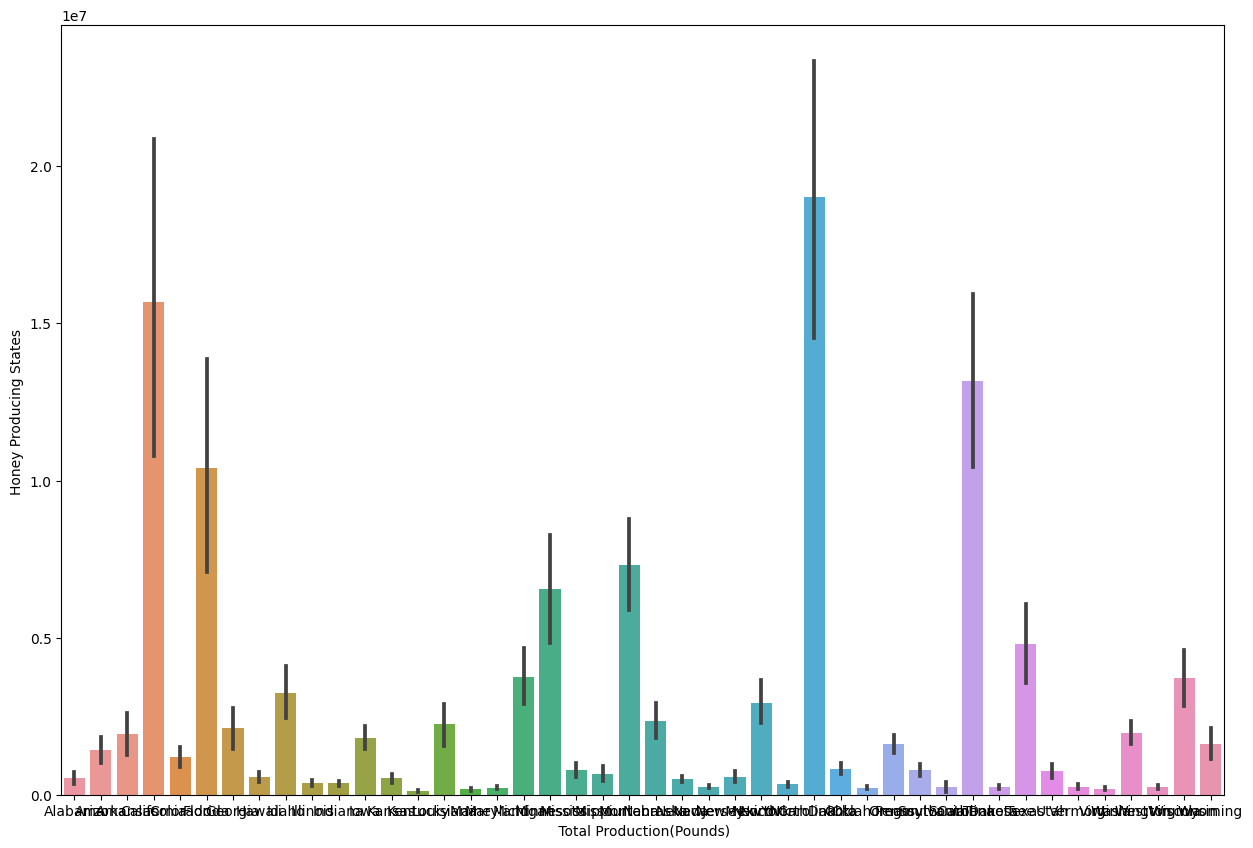

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x=df["state"],y=df["production"])
plt.xlabel(" Total Production(Pounds)")
plt.ylabel("Honey Producing States ")
plt.show()

In [14]:
# from Above Graph we can Infer that the Top 5 Honey Producing States are:
#     North Dakota
#     California
#     South Dakota
#     Florida
#     Montana

In [15]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [16]:
# df.sort_values(ascending = False)
# Grouping all the columns by their mean according to year
df1=df.groupby("year").mean()
df1

C:\Users\pande\AppData\Local\Temp\ipykernel_21468\3143585983.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=df.groupby("year").mean()


,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06


In [17]:
df1=df1.reset_index()

In [18]:
# a = (df1['year']<=2013)
df1

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


In [19]:
df3 = pd.DataFrame(df['year']<=2013)

In [20]:
df3

,year
0,True
1,True
2,True
3,True
4,True
...,...
1110,False
1111,False
1112,False
1113,False


# Change in Average price of Honey From 1995 to 2021


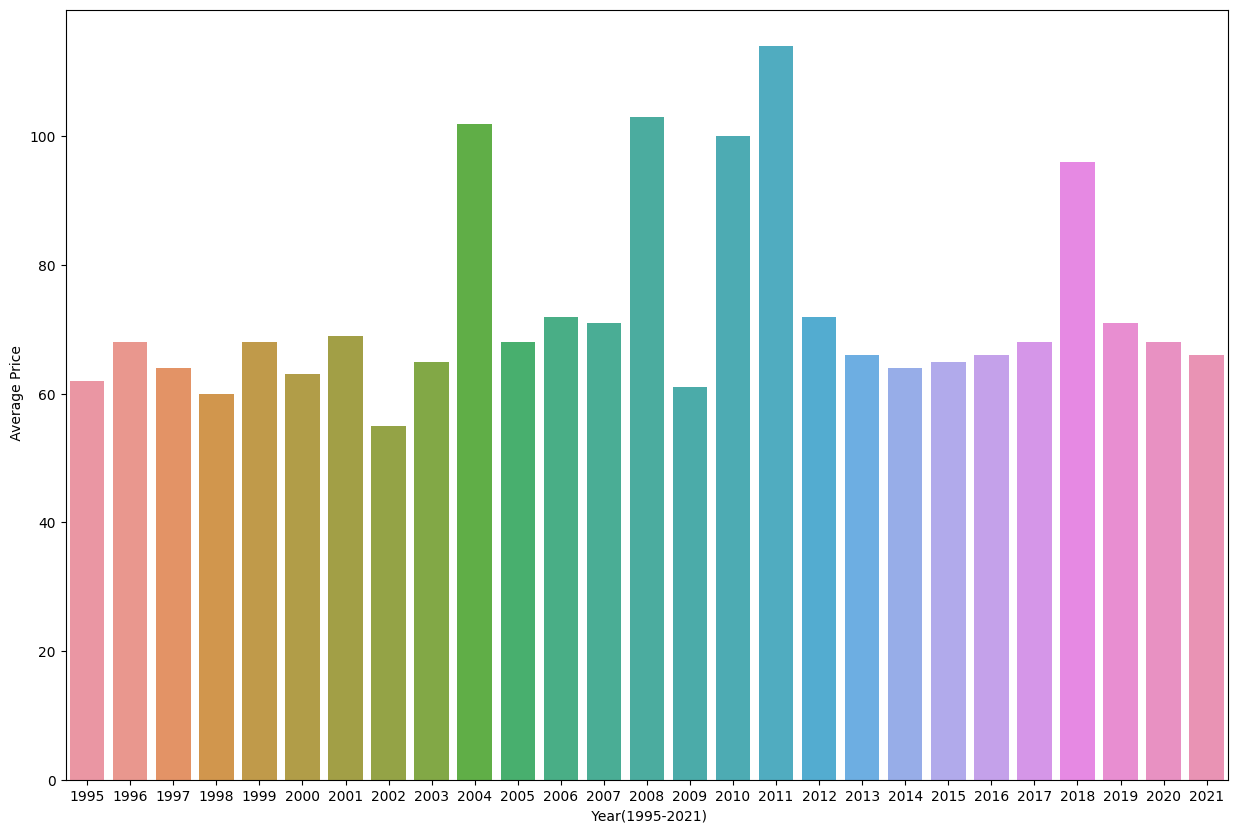

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1["year"],y=df["average_price"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel(" Average Price")
plt.show()

# Honey Production from 1995 to 2021

Which was the year when production of Honey was the highest ?

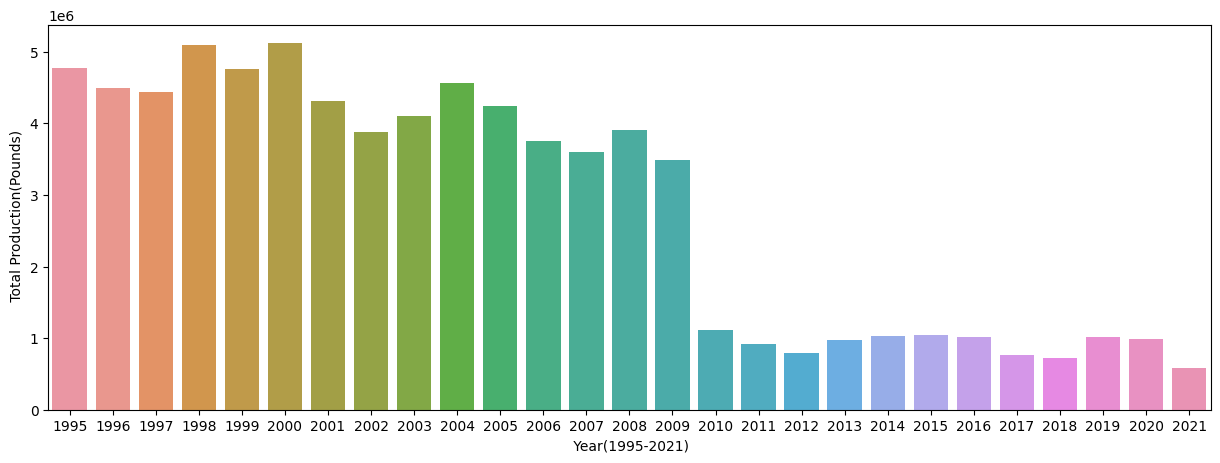

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1["year"],y=df1["production"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel(" Total Production(Pounds)")
plt.show()

Pie chart of production of honey in percentage from 1995-2021

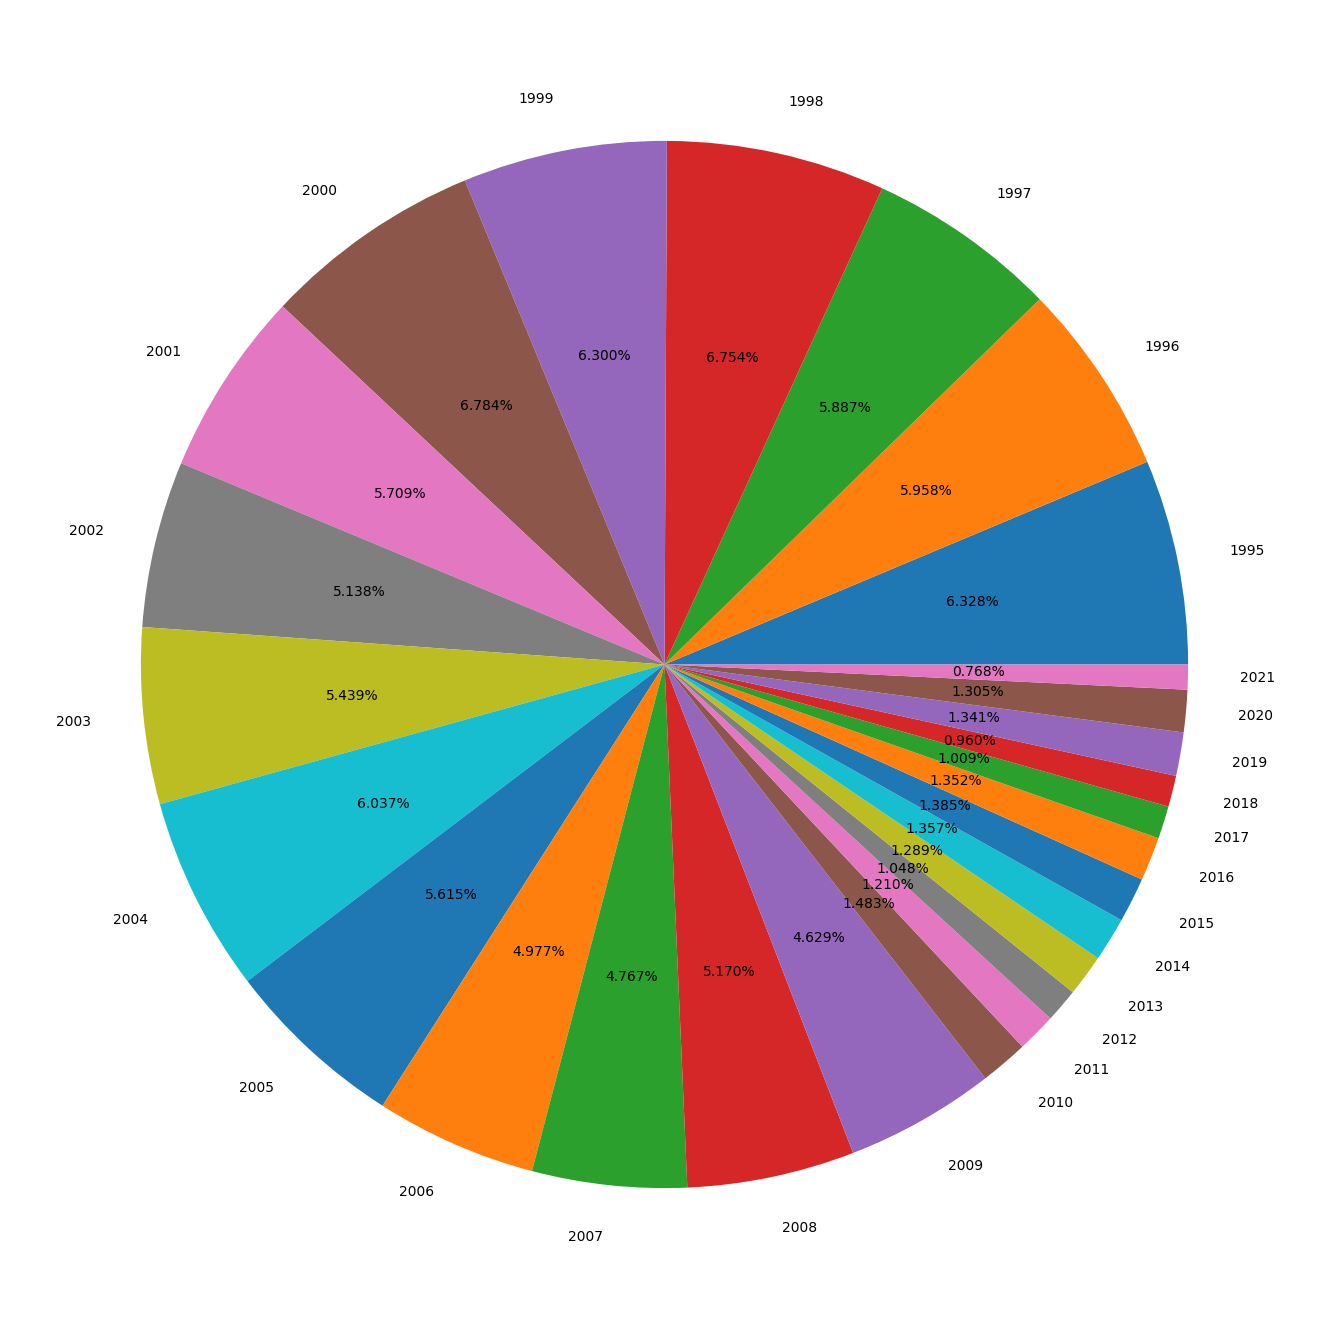

In [23]:
plt.figure(figsize=(20,17))
plt.pie(df1["production"],autopct='%0.3f%%',labels = df1["year"])
plt.show()

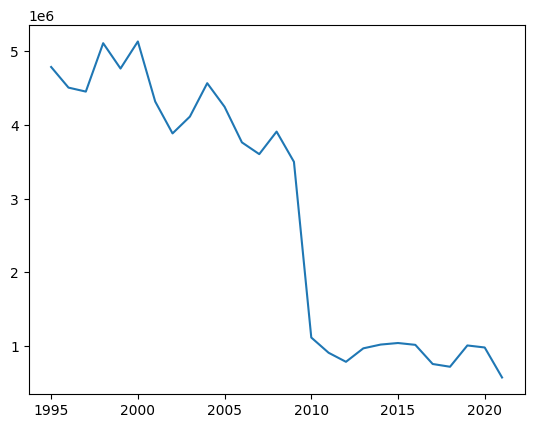

In [24]:
plt.plot(df1["year"],df1["production"])
plt.show()

# We can see the trend that there is reduce in production of honey from 1995-2021

In [25]:
# Clearly we can see that in year 2000 total production was the highest

Clearly we can see that in year 2000 total production was the highest

Which was the year when total value of production of Honey was the highest ?

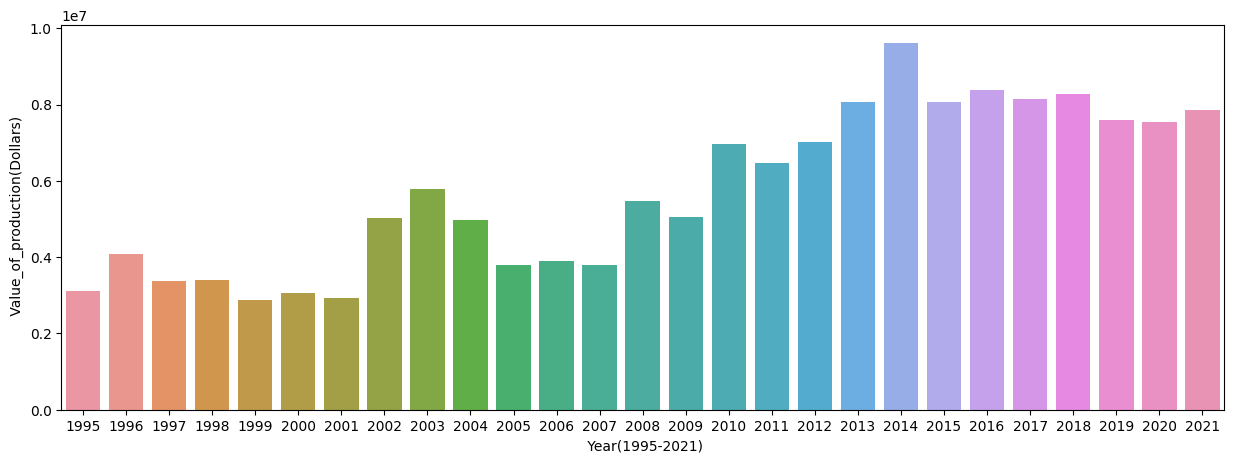

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1["year"],y=df1["value_of_production"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel(" Value_of_production(Dollars)")
plt.show()

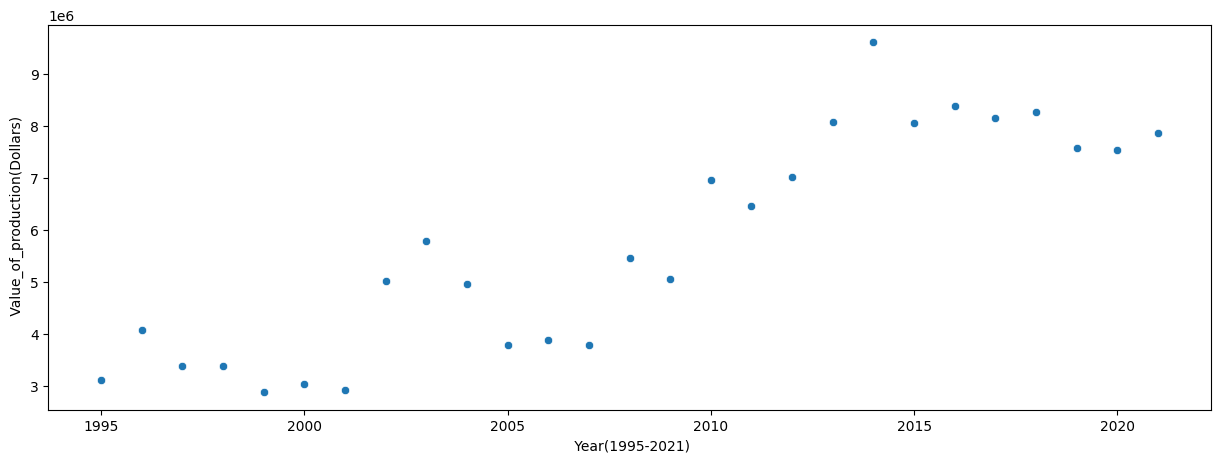

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df1["year"],y=df1["value_of_production"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel(" Value_of_production(Dollars)")
plt.show()

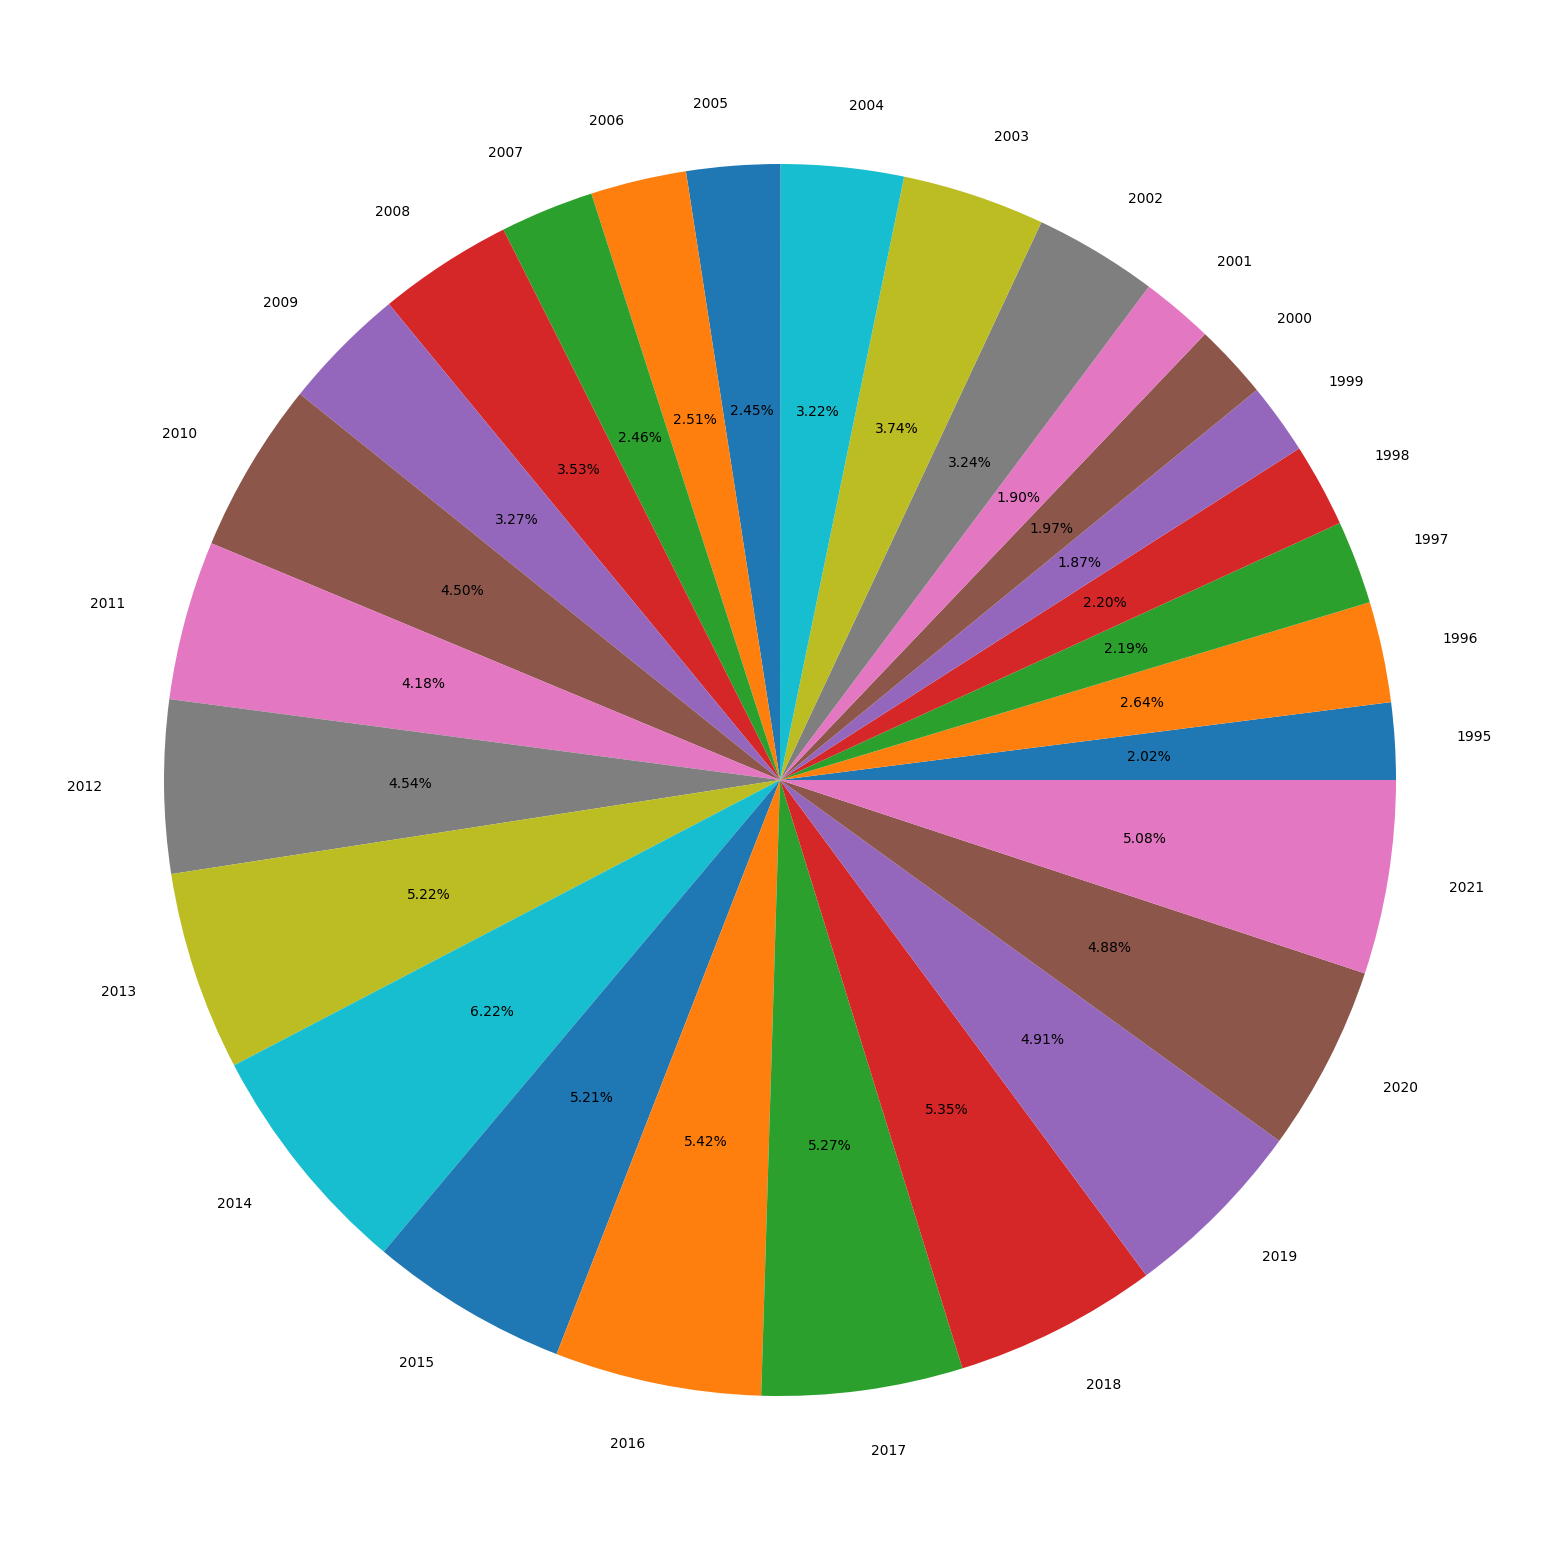

In [28]:
plt.figure(figsize=(20,20))
plt.pie(df1["value_of_production"],autopct='%0.2f%%',labels = df1["year"])
plt.show()

Inference-  2014 is the Year in which the Highest value of production is found.

In [29]:
#from the above bar chart,scatterplot and pie chart we can infer that the highest value of production is in year 2014.

In which year the price of honey is cheapest.

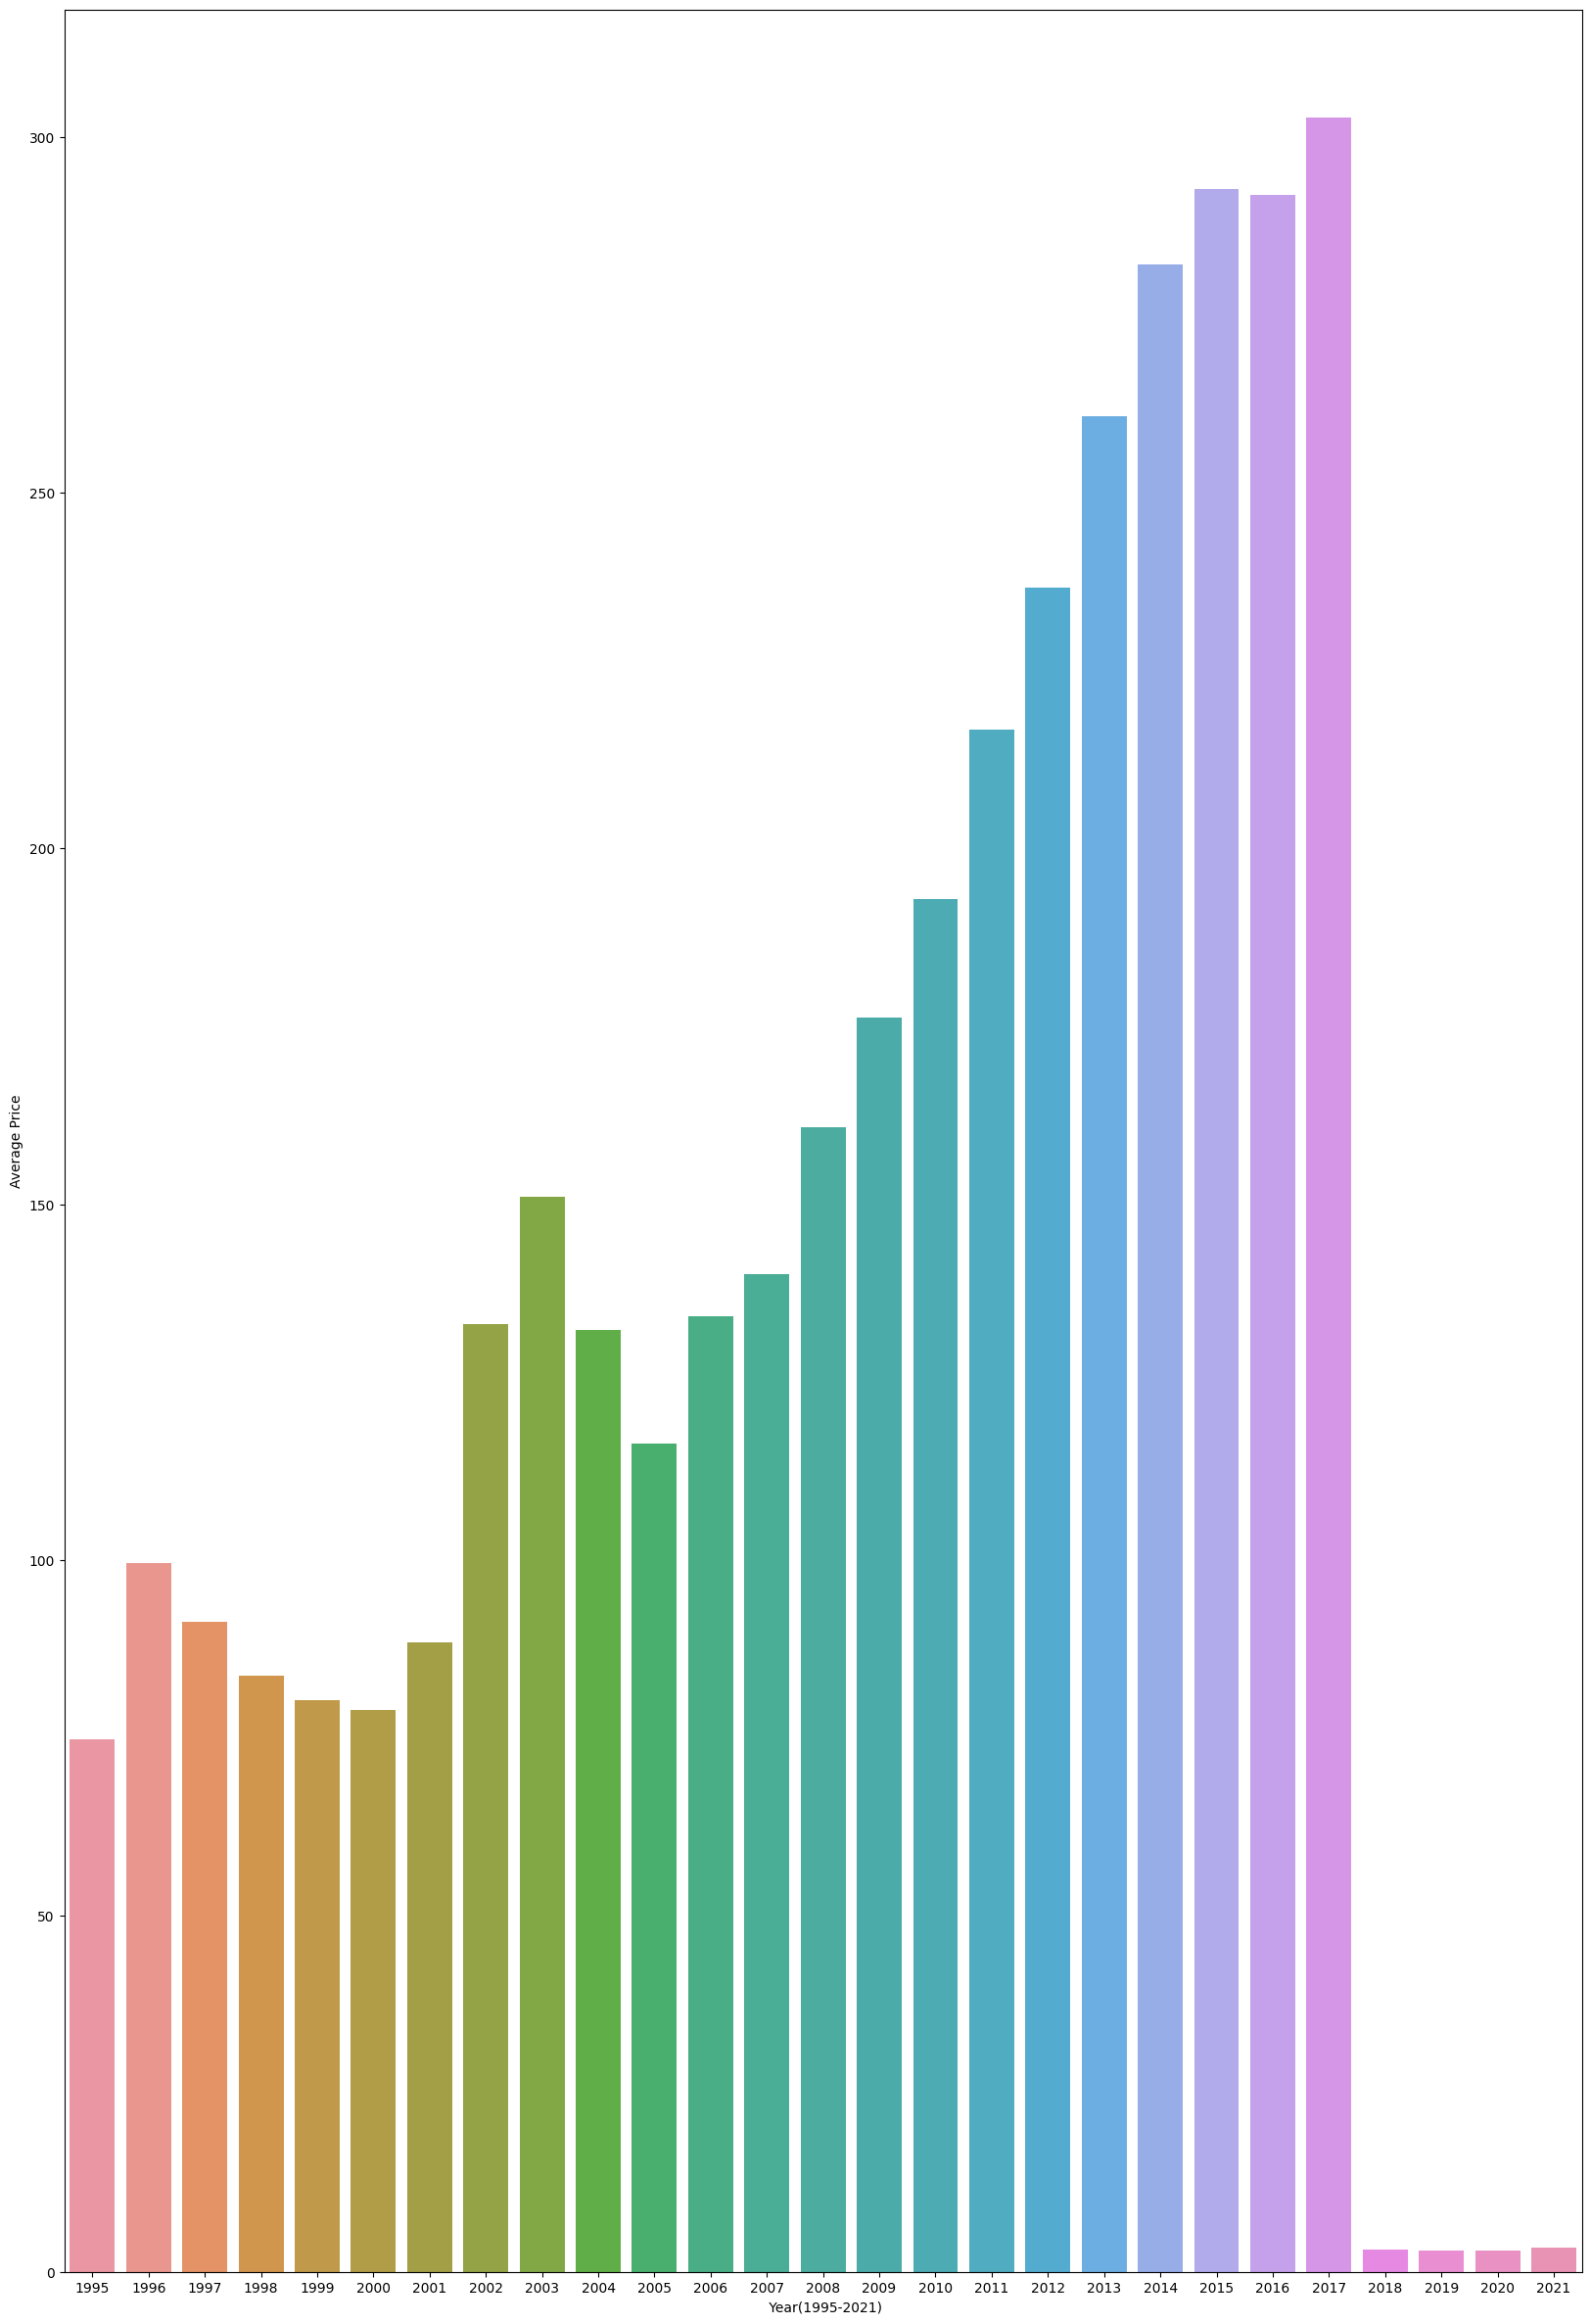

In [30]:
plt.figure(figsize=(20,30))
sns.barplot(x=df1["year"],y=df1["average_price"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel("Average Price")
plt.show()

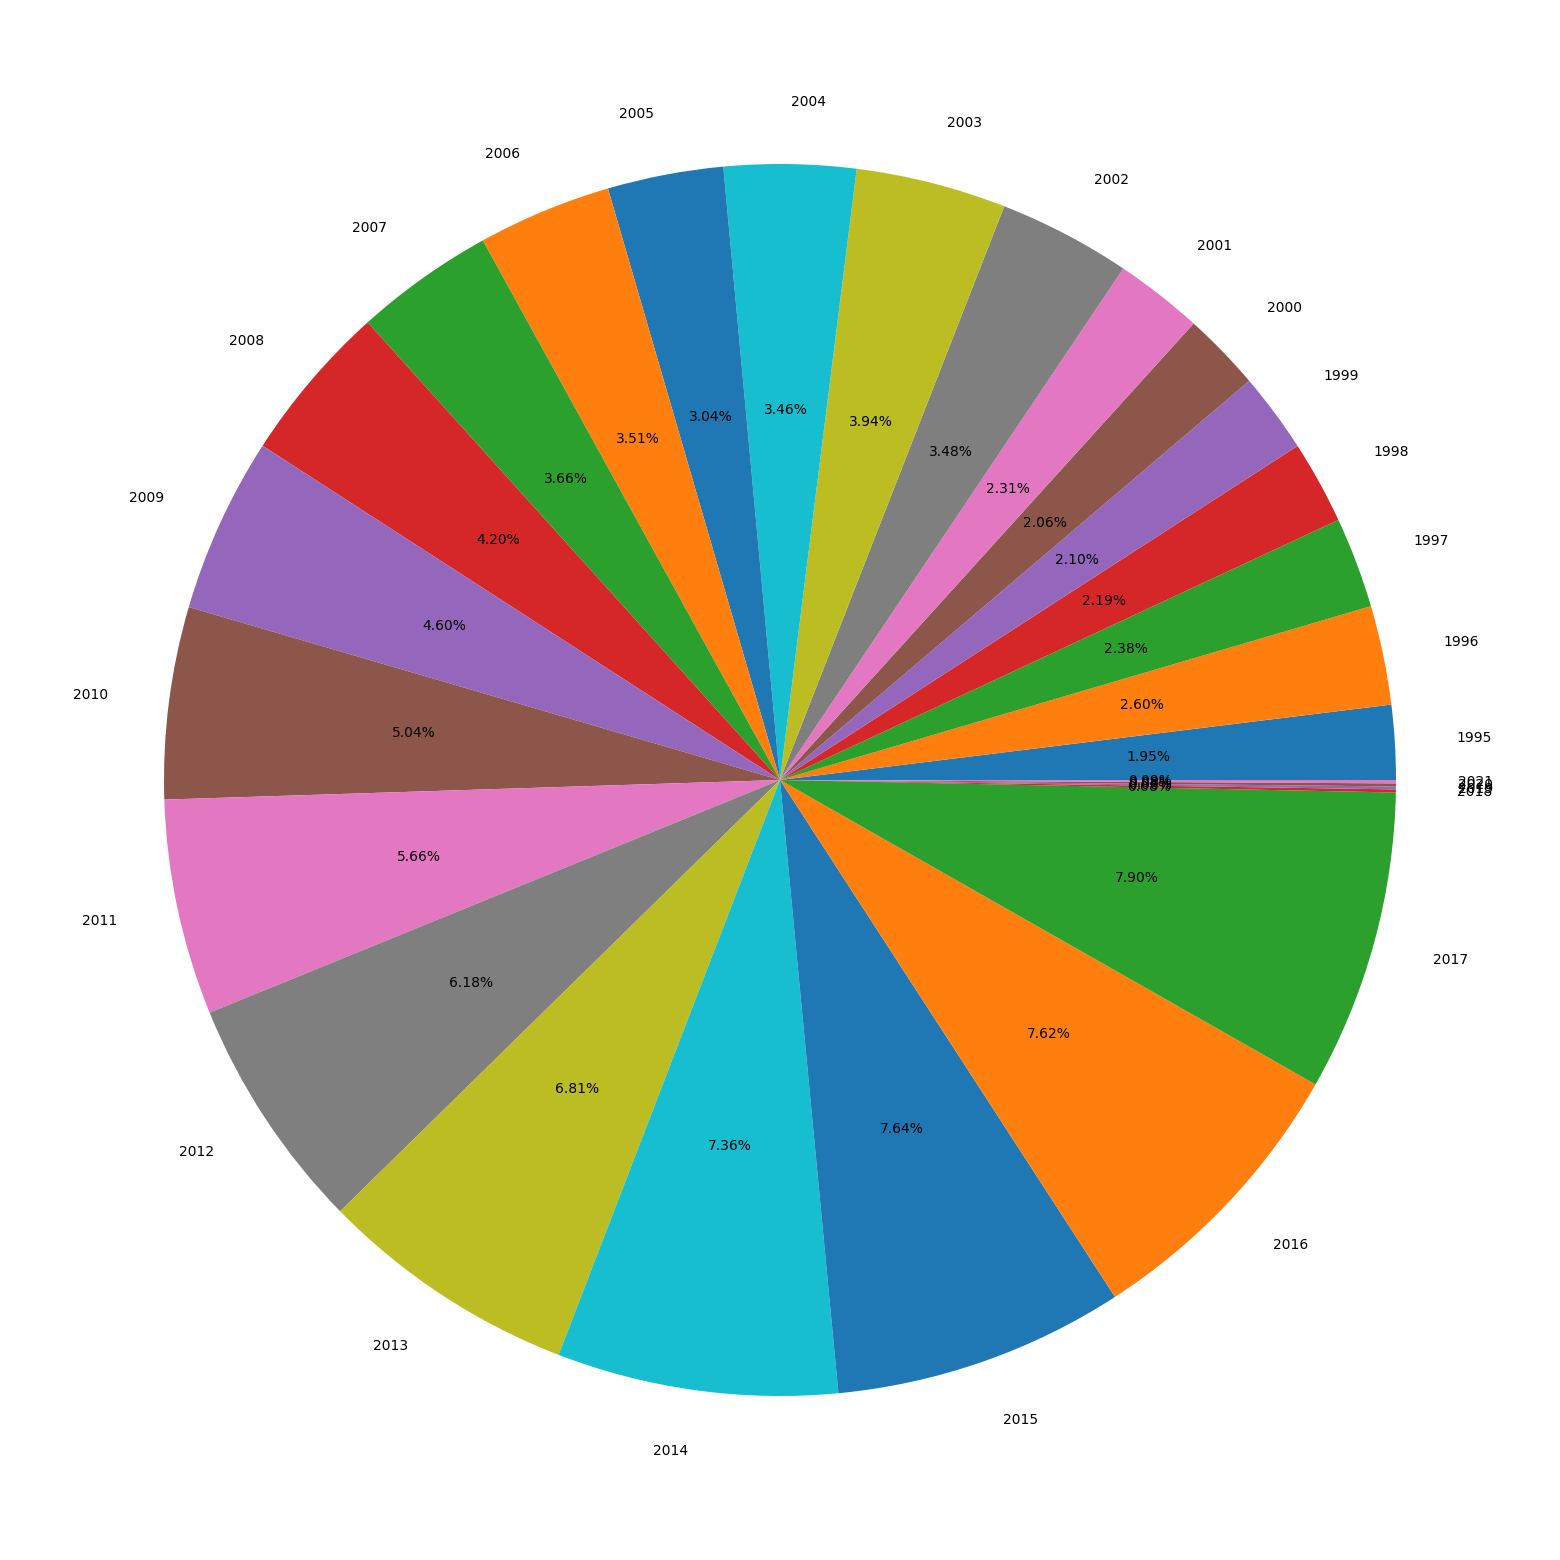

In [31]:
plt.figure(figsize=(40,20))
plt.pie(df1["average_price"],autopct='%0.2f%%',labels = df1["year"])
plt.show()

# Grouping data by state

In [32]:
df2=df.groupby(["state"]).sum()
df2=df2.reset_index()

In [33]:
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000,54216
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000,54216
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
6,Georgia,1917000,1354,57426000,9932000,3260.68,145945000,54216
7,Hawaii,296000,2802,15420000,3508000,3719.13,49888000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216
9,Illinois,236000,1562,9864000,4957000,5842.43,36782000,54216


States having Highest no. of stocks

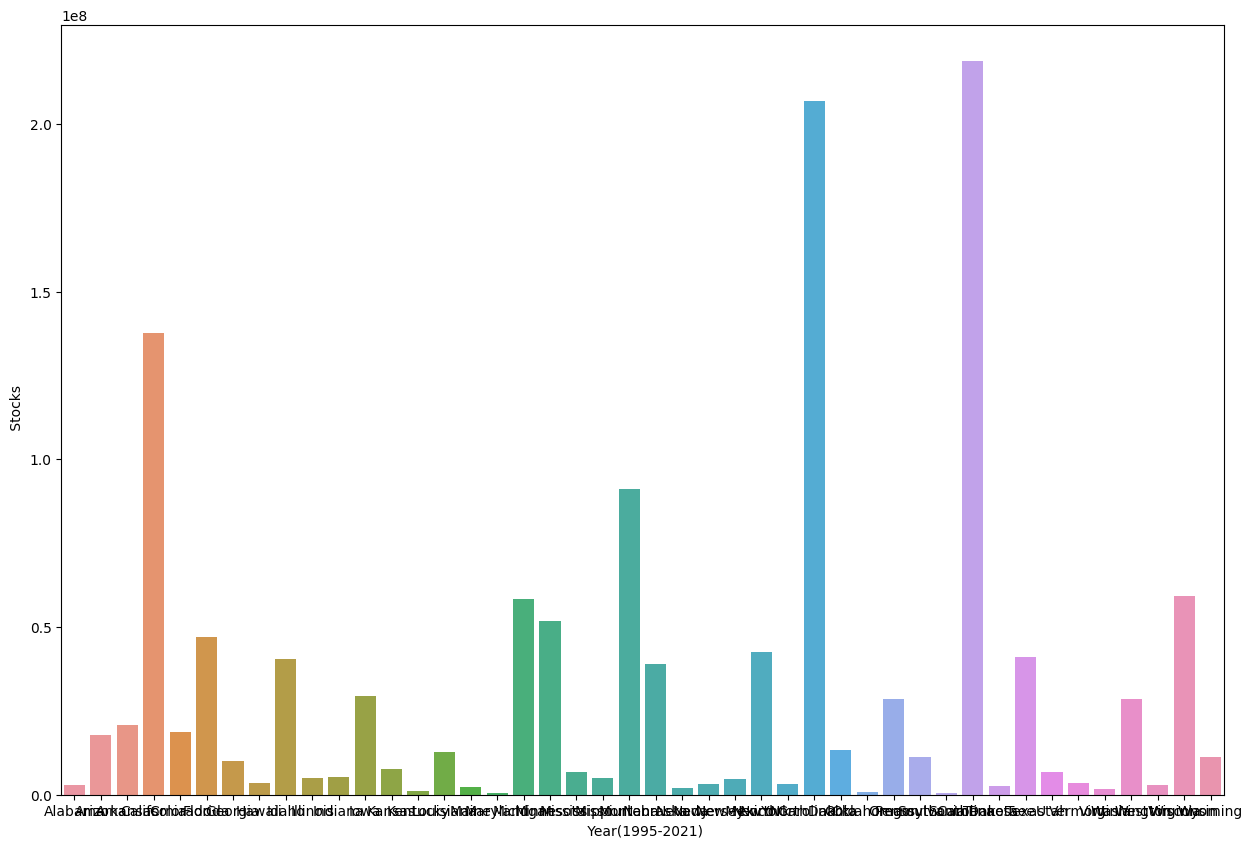

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2["state"],y=df2["stocks"])
plt.xlabel(" Year(1995-2021)")
plt.ylabel(" Stocks")
plt.show()

In [35]:
# Inference- From the above figure we can infer that Top 3 states having large no. of stocks are:
#     South Dakoda
#     North Dakoda
#     California


# States having Highest no. of colonies

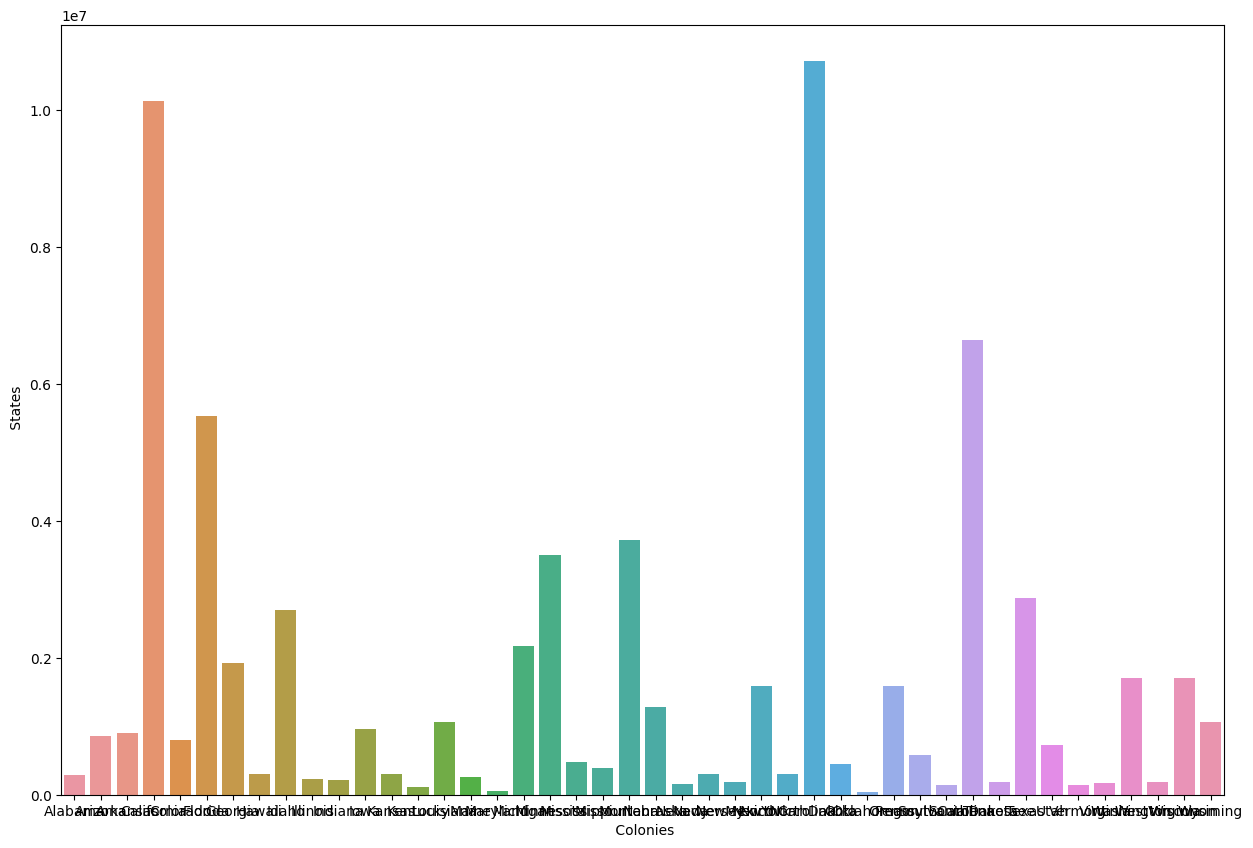

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2["state"],y=df2["colonies_number"])
plt.xlabel(" Colonies")
plt.ylabel(" States")
plt.show()

# which state is having highest no. of colonies ?

Inference -From the above graph we can clearly infer that the North Dakota  is having the maximum no. of colonies

In [37]:
# North Dakota, California, South Dakota